---
# 1. EDA

<div style="text-align: justify;">

En esta primera etapa de nuestro proyecto, llevamos a cabo un Análisis Exploratorio de Datos (EDA) para comprender en profundidad la información contenida en nuestro dataset. En este notebook se trabaja en la limpieza y preparación de los datos, eliminando duplicados y registros con valores faltantes, lo que nos permite contar con un conjunto de datos robusto y de calidad.

Decidimos filtrar el dataset para quedarnos únicamente con aquellos libros que ofrecen descripciones suficientemente detalladas –más de 50 palabras– y que han recibido un número significativo de reviews, lo que garantiza que las recomendaciones posteriores se basen en información representativa y validada socialmente. Además, hemos aplicado un proceso de detección de idioma para asegurarnos de que solo se analicen textos en inglés, lo que es crucial para mantener la consistencia en el procesamiento del lenguaje.

El siguiente paso fue la normalización de las descripciones: mediante expresiones regulares limpiamos los textos de caracteres corruptos, eliminamos símbolos no deseados y estandarizamos el uso de mayúsculas y minúsculas. Esta transformación nos permitió generar una columna “clean_description” que, además de ser homogénea, facilita las etapas posteriores de análisis y modelado.

Una vez preparado el dataset, exploramos diversos aspectos que nos ayudaron a entender su estructura y distribución. Analizamos el campo del género, observamos las principales estadísticas del dataset y resaltamos tendencias importantes, como los autores con más libros publicados, los títulos con mayor número de reseñas, y la distribución de las puntuaciones y de los votos. Estas visualizaciones, apoyadas en gráficos de barras y distribuciones, nos ofrecen una perspectiva clara sobre la calidad y el comportamiento de los datos.

En resumen, este EDA nos ha permitido identificar y limpiar las fuentes de ruido, seleccionar los registros más significativos y comprender las relaciones y patrones presentes en el dataset. Todo este proceso nos sienta las bases para las etapas posteriores del proyecto.
</div>

In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

En primer lugar, cargamos el datset y eliminamos los datos duplicados

In [89]:
# Leer el CSV
dataset_I = pd.read_csv('datasets/books2.csv')
# dataset_I['desc'] = dataset_I['desc'].fillna('')
dataset = dataset_I.drop_duplicates(keep=False)

Observamos el dataset que acabamos de cargar.

In [90]:
dataset

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Simon Monk,ebook,Design custom printed circuit boards with EAGL...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,71819266,9.78007E+12,https://goodreads.com/book/show/17320181-make-...,304,4.07,7,Make Your Own PCBs with Eagle: From Schematic ...,56
99996,"Tracie L. Miller-Nobles,Brenda L. Mattison,Ell...",Hardcover,"Redefining tradition in learning accounting. ,...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,133251241,9.78013E+12,https://goodreads.com/book/show/17320260-horng...,1645,4.05,1,Horngren's Financial & Managerial Accounting,38
99997,C. John Miller,Paperback,In these warm reflections on his own growth as...,"Christianity,Evangelism,Christian,Religion,The...",https://i.gr-assets.com/images/S/compressed.ph...,875523919,9.78088E+12,https://goodreads.com/book/show/173203.A_Faith...,160,4.27,20,A Faith Worth Sharing: A Lifetime of Conversat...,122
99998,Albert Marrin,Hardcover,"John Brown is a man of many legacies, from her...","Nonfiction,History,Biography,Military History,...",https://i.gr-assets.com/images/S/compressed.ph...,307981533,9.78031E+12,https://goodreads.com/book/show/17320669-a-vol...,256,3.63,51,A Volcano Beneath the Snow: John Brown's War A...,156


Imprimimos las columnas y elminamos aquellas que no vamos a utilizar.

In [91]:
dataset.columns

Index(['author', 'bookformat', 'desc', 'genre', 'img', 'isbn', 'isbn13',
       'link', 'pages', 'rating', 'reviews', 'title', 'totalratings'],
      dtype='object')

In [92]:
dataset.drop(columns=['isbn13', 'link','img', 'pages','isbn', 'bookformat'], inplace=True)

Vemos qué estructura tiene el dataset despúes de eliminar las columnas y buscamos datos faltantes.

In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   author        100000 non-null  object 
 1   desc          93228 non-null   object 
 2   genre         89533 non-null   object 
 3   rating        100000 non-null  float64
 4   reviews       100000 non-null  int64  
 5   title         99999 non-null   object 
 6   totalratings  100000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.3+ MB


In [94]:
dataset.isnull().sum()

author              0
desc             6772
genre           10467
rating              0
reviews             0
title               1
totalratings        0
dtype: int64

Dado que disponemos aproximadamente de 100000 registros, decidimos eliminar aquellas columnas registros que tienen alguna columna faltante, para evitar problemas en las estapas posteriores.

In [95]:
dataset=dataset.dropna()

Comprobamos que, efectivamente, ya no tenemos valores faltantes

In [96]:
dataset.isnull().sum()

author          0
desc            0
genre           0
rating          0
reviews         0
title           0
totalratings    0
dtype: int64

Comprobamos los tipos de datos y que contamos con el mismo numero de registros no nulos para todas las columnas.

In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85485 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        85485 non-null  object 
 1   desc          85485 non-null  object 
 2   genre         85485 non-null  object 
 3   rating        85485 non-null  float64
 4   reviews       85485 non-null  int64  
 5   title         85485 non-null  object 
 6   totalratings  85485 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.2+ MB


In [98]:
dataset.shape

(85485, 7)

Se ha decidido filtrar el dataset de la siguiente forma para asegurar que el recomendador se base en información de calidad y que los resultados sean más precisos y relevantes. En concreto:

- **Descripción del libro:**  
  Se mantiene únicamente aquellos libros cuya descripción (campo `desc`) contenga más de 50 palabras. Esto garantiza que cada libro disponga de un resumen suficientemente extenso como para extraer características y matices relevantes sobre el contenido, estilo y temática, lo que en última instancia mejora la capacidad del sistema para hacer recomendaciones acertadas.

- **Cantidad de reviews:**  
  Se conservan solo los libros que hayan recibido más de 100 reviews. Un mayor número de reviews suele ser un indicador de la popularidad y la relevancia del libro entre los usuarios.

En resumen, esta decisión se ha tomado para enfocarnos en aquellos registros que aportan una información sustancial tanto en contenido descriptivo como en la validación social del libro.

In [99]:
dataset = dataset[dataset['desc'].apply(lambda x: len(x.split()) > 50)]
dataset = dataset[dataset['reviews'] > 100]


Comprobamos con cuántos registros nos hemos quedado:

In [100]:
dataset.shape

(18192, 7)

El comando `dataset = dataset.reset_index(drop=True)` reinicia los índices del DataFrame, asignando nuevos índices consecutivos que comienzan en 0.  
El parámetro `drop=True` indica que el índice anterior no se conservará en una nueva columna, eliminándolo completamente del DataFrame.

In [101]:
dataset = dataset.reset_index(drop=True)

A continuación,  vamos a asegurarnos de que solo se analicen los textos en inglés con contenido válido.
Para ello, se sigue el siguiente proceso:

1. **Importación de librerías:**  
   Se importa la función `detect` de la librería `langdetect` para identificar el idioma de un texto y se trae la excepción `LangDetectException` para manejar casos en los que la detección falle.

2. **Definición de la función `detectar_idioma`:**  
   Esta función recibe un texto como entrada y, usando `detect(texto)`, intenta determinar su idioma. Si el texto no es adecuado para la detección (por ejemplo, es muy corto o está vacío), se captura la excepción `LangDetectException` y se devuelve `None`.

3. **Aplicación de la detección de idioma:**  
   Se aplica la función `detectar_idioma` a cada registro de la columna `desc` del DataFrame, creando una nueva columna llamada `idioma` que contendrá el resultado (por ejemplo, 'en' para inglés).

4. **Filtrado del DataFrame:**  
   Finalmente, se filtra el DataFrame para quedarnos únicamente con las filas que:
   - Tengan como idioma detectado `'en'` (es decir, textos en inglés).
   - No tengan valores nulos en la columna `desc`.


**Nota**: La librería `langdetect` se basa en un enfoque estadístico utilizando n-gramas y análisis de frecuencias de caracteres para identificar el idioma del texto.


In [102]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
 
# Detecta el idioma o devuelve None si falla
def detectar_idioma(texto):
    try:
        return detect(texto)
    except LangDetectException:
        return None
 
# Aplica detección de idioma
dataset['idioma'] = dataset['desc'].apply(detectar_idioma)
 
# Filtra solo textos en inglés y no vacíos
dataset = dataset[(dataset['idioma'] == 'en') & (dataset['desc'].notna())]
 

Definimos la función `limpiar_texto` que se encarga de preparar y normalizar un texto para su posterior análisis. 

1. **Verificación del tipo de dato:**  
   La función primero comprueba si el argumento `texto` es una cadena de caracteres (`str`). En caso de no serlo, retorna una cadena vacía, evitando errores en pasos posteriores.

2. **Eliminación de caracteres corruptos:**  
   Se utiliza `re.sub` para reemplazar ocurrencias de caracteres corruptos (como `Â` y `\xa0`, este último representa un espacio no separable) por un espacio normal. Esto corrige problemas comunes en textos que provienen de fuentes con codificación incorrecta.

3. **Conversión a minúsculas:**  
   El texto se convierte a minúsculas usando el método `.lower()`, lo cual es importante para mantener la consistencia y evitar duplicidad de información al tratar palabras que solo difieren en mayúsculas/minúsculas.

4. **Eliminación de caracteres no alfanuméricos:**  
   Se aplica otra sustitución con `re.sub` para eliminar cualquier carácter que no sea alfanumérico. La expresión regular `[^a-z0-9áéíóúñçü\s]` permite únicamente letras (incluyendo algunas con acentos y la ñ), números y espacios. De esta manera se descartan símbolos o caracteres especiales que puedan interferir en el análisis.

5. **Normalización de espacios:**  
   Finalmente, se reemplazan múltiples espacios consecutivos por un único espacio y se eliminan espacios en blanco al inicio y al final del texto utilizando `.strip()`.



In [103]:
import re
 
def limpiar_texto(texto):
    if not isinstance(texto, str):
        return ""
    
    # Elimina caracteres corruptos como Â, Â , etc.
    texto = re.sub(r'[Â\xa0]+', ' ', texto)  # \xa0 es espacio no separable

    # Se elimina la conversión a minúsculas para preservar las mayúsculas
    
    # Permite letras (mayúsculas y minúsculas), números, espacios y algunos signos de puntuación (coma, punto, dos puntos y apóstrofe)
    texto = re.sub(r"[^A-Za-z0-9áéíóúÁÉÍÓÚñçüÑÇÜ\s,.\':]", '', texto)
    
    # Reemplaza espacios múltiples por uno solo
    texto = re.sub(r'\s+', ' ', texto).strip()
    
    return texto

In [104]:
dataset['clean_description'] = dataset['desc'].apply(limpiar_texto)
dataset.to_csv('clean_description_english.csv', index=False)

Una vez hemos limpiado y preparado el dataset para su posterior análisis, vamos a hacer un análisis exploratorio que nos permita entender qué tenemos.

Exploramos el campo del género:

In [105]:
dataset.genre.value_counts()

genre
Mystery,Fiction,Mystery,Crime,Classics,Mystery,Detective,Thriller,Mystery Thriller,European Literature,British Literature,Audiobook,Mystery,Murder Mystery,Thriller                                                7
Mystery,Fiction,Mystery,Crime,Classics,Mystery,Detective,Thriller,Mystery Thriller,European Literature,British Literature,Audiobook,Thriller,Mystery,Murder Mystery                                                5
Romance,Historical Romance,Romance,Historical,Historical,Regency,Historical,Historical Fiction,Historical Romance,Regency Romance,Fiction,Adult,European Literature,British Literature,Womens Fiction,Chick Lit    5
Mystery,Romance,Mystery,Crime,Fiction,Romance,Romantic Suspense,Futuristic,Suspense,Science Fiction,Thriller,Thriller,Mystery Thriller                                                                             4
Mystery,Fiction,Mystery,Crime,Thriller,Thriller,Mystery Thriller,Suspense,Literature,Jewish,Mystery,Detective,Audiobook,Adult                 

Imprimimos un resumen estadístico de todas las columnas del DataFrame `dataset`:

In [106]:
print(dataset.describe(include='all'))

                 author                                               desc  \
count             17452                                              17452   
unique            11410                                              17444   
top     Agatha Christie  This scarce antiquarian book is a facsimile re...   
freq                 44                                                  3   
mean                NaN                                                NaN   
std                 NaN                                                NaN   
min                 NaN                                                NaN   
25%                 NaN                                                NaN   
50%                 NaN                                                NaN   
75%                 NaN                                                NaN   
max                 NaN                                                NaN   

                                                    genre      

Podemos ver, por ejemplo, como tenemos 11408 autores diferentes.

### Top 10 escritores con más libros

In [107]:
authors = dataset[dataset['author'].str.strip() != '']['author'].value_counts().head(10)
authors

author
Agatha Christie    44
Kristen Ashley     38
Nora Roberts       32
R.L. Stine         31
Stephen King       29
Julie Garwood      26
Mercedes Lackey    24
Maya Banks         22
Anne Perry         19
Tamora Pierce      18
Name: count, dtype: int64

/var/folders/6r/17dbwpxj45s03vzxrc5kddj40000gn/T/ipykernel_38057/1719314631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = "author", data = dataset, order = authors.index, palette = "Accent")


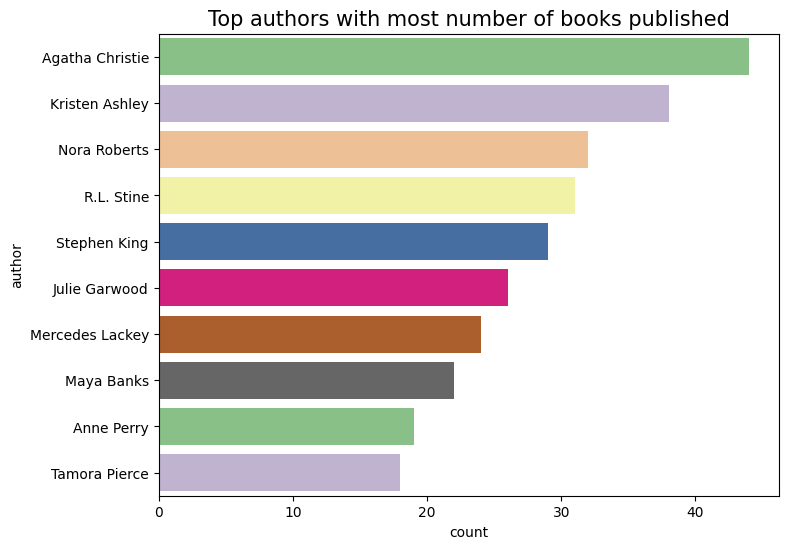

In [108]:
plt.figure(figsize=(8,6))
sns.countplot(y = "author", data = dataset, order = authors.index, palette = "Accent")
plt.title('Top authors with most number of books published', fontsize = 15)
plt.show()

Como se puede observar en la gráfica, los autores con más libros son Agatha Christie y Kristen Ashley

### Libros con más reseñas

In [109]:
books = dataset.sort_values('totalratings', ascending = False).head(10).set_index('title')
books

,author,desc,genre,rating,reviews,totalratings,idioma,clean_description
title,,,,,,,,
The Fault in Our Stars,John Green,Despite the tumor-shrinking medical miracle th...,"Young Adult,Romance,Fiction,Contemporary,Reali...",4.19,158776,3819326,en,Despite the tumorshrinking medical miracle tha...
Divergent,Veronica Roth,"In Beatrice Prior's dystopian Chicago world, s...","Young Adult,Science Fiction,Dystopia,Fiction,F...",4.18,110042,3099689,en,"In Beatrice Prior's dystopian Chicago world, s..."
Harry Potter and the Deathly Hallows,J.K. Rowling,Harry Potter is leaving Privet Drive for the l...,"Fantasy,Young Adult,Fiction,Fantasy,Magic,Chil...",4.62,68974,2984351,en,Harry Potter is leaving Privet Drive for the l...
Animal Farm,"George Orwell,Russell Baker,C.M. Woodhouse",Librarian's note: There is an Alternate Cover ...,"Classics,Fiction,Science Fiction,Dystopia,Fant...",3.96,61970,2938072,en,Librarian's note: There is an Alternate Cover ...
Harry Potter and the Chamber of Secrets,"J.K. Rowling,Mary GrandPrÃ©",Ever since Harry Potter had come home for the ...,"Fantasy,Young Adult,Fiction,Fantasy,Magic,Chil...",4.43,57146,2934616,en,Ever since Harry Potter had come home for the ...
"The Lion, the Witch and the Wardrobe",C.S. Lewis,"Narniaâ€¦ the land beyond the wardrobe door, a...","Fantasy,Classics,Fiction,Young Adult,Childrens...",4.22,23770,2256904,en,"Narnia the land beyond the wardrobe door, a se..."
A Game of Thrones,George R.R. Martin,Here is the first volume in George R. R. Marti...,"Fantasy,Fiction,Fantasy,Epic Fantasy,Adult,Sci...",4.44,55705,2097707,en,Here is the first volume in George R. R. Marti...
The Lovely Bones,Alice Sebold,"""My name was Salmon, like the fish; first name...","Fiction,Mystery,Young Adult,Contemporary,Fanta...",3.82,41393,2095009,en,"My name was Salmon, like the fish first name, ..."
Fifty Shades of Grey,E.L. James,When literature student Anastasia Steele goes ...,"Romance,Fiction,Adult Fiction,Erotica,Adult,Er...",3.66,79264,2070036,en,When literature student Anastasia Steele goes ...


/var/folders/6r/17dbwpxj45s03vzxrc5kddj40000gn/T/ipykernel_38057/188225505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=books['totalratings'], y=books.index, palette='Set2')


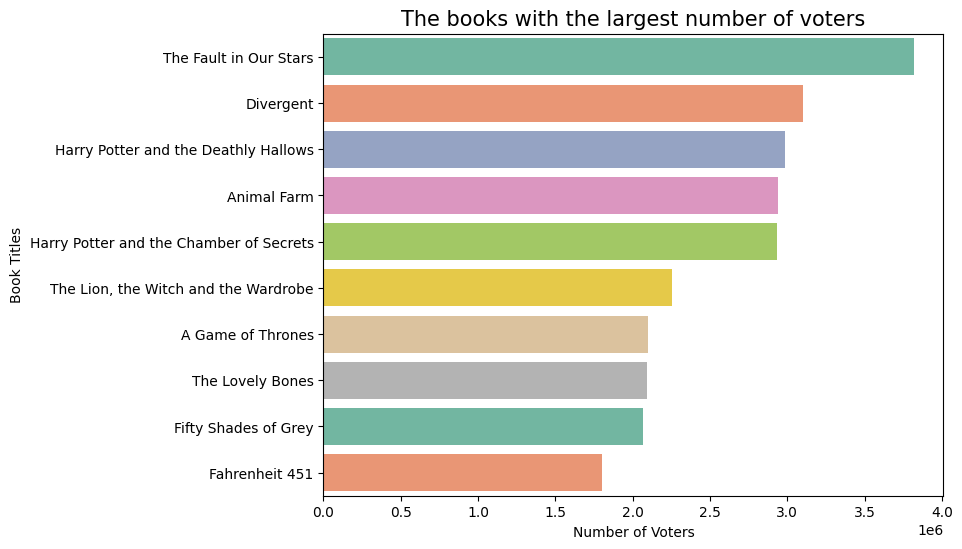

In [110]:
plt.figure(figsize=(8,6))
sns.barplot(x=books['totalratings'], y=books.index, palette='Set2')
plt.title('The books with the largest number of voters', fontsize=15)
plt.xlabel('Number of Voters')
plt.ylabel('Book Titles')
plt.show()

Podemos ver que los libros con mayor número de reseñas son 'The fault in our stars' y 'Divergent'

### Mejores libros por valoración media

Se escogen solo aquellos libros que tengan más de 500 votaciones para evitar resultados erróneos.

In [111]:
ratings = dataset[dataset['totalratings']>5000]
ratings

,author,desc,genre,rating,reviews,title,totalratings,idioma,clean_description
1,Christopher Morley,"Roger Mifflin is part pixie, part sage, part n...","Fiction,Writing,Books About Books,Classics,Hum...",4.03,1214,Parnassus on Wheels,6107,en,"Roger Mifflin is part pixie, part sage, part n..."
2,Robert J. Shiller,As Robert Shillerâ€™s new 2009 preface to his ...,"Economics,Economics,Finance,Business,Nonfictio...",3.98,275,Irrational Exuberance,7019,en,As Robert Shillers new 2009 preface to his pre...
3,Joseph Staten,"This is how it began...,It is the year 2524. H...","Science Fiction,Fiction,Games,Video Games,Spor...",3.98,271,Halo: Contact Harvest,8033,en,"This is how it began...,It is the year 2524. H..."
5,Eliezer Yudkowsky,Harry Potter and the Methods of Rationality is...,"Fantasy,Fiction,Fan Fiction,Philosophy,Science...",4.40,1414,Harry Potter and the Methods of Rationality,14293,en,Harry Potter and the Methods of Rationality is...
7,Blanche Fisher Wright,"For nearly a century, The Real Mother Goose ha...","Childrens,Poetry,Childrens,Picture Books,Class...",4.30,347,The Real Mother Goose,36456,en,"For nearly a century, The Real Mother Goose ha..."
...,...,...,...,...,...,...,...,...,...
18172,"David Heinemeier Hansson,Jason Fried",The â€œwork from homeâ€ phenomenon is thoroug...,"Business,Nonfiction,Business,Management,Produc...",3.82,1018,Remote: Office Not Required,11398,en,The work from home phenomenon is thoroughly ex...
18174,Melissa Landers,The romantic sequel to Alienated takes long-di...,"Young Adult,Science Fiction,Romance,Science Fi...",3.94,993,Invaded,7056,en,The romantic sequel to Alienated takes longdis...
18175,Elizabeth Moon,Paks the warrior must learn to live with Paks ...,"Fantasy,Fiction,Fantasy,Epic Fantasy,Fantasy,H...",4.27,235,Oath of Gold,6919,en,Paks the warrior must learn to live with Paks ...
18179,C.J. Roberts,I'm writing this because you begged. You know ...,"Dark,Romance,Erotica,BDSM,Adult Fiction,Erotic...",4.26,2533,Epilogue,28007,en,I'm writing this because you begged. You know ...


In [112]:
books_rated = ratings[['rating','title']].groupby('title').mean().sort_values('rating', axis=0, ascending = False).head(10)
books_rated

,rating
title,
"The Way of Kings, Part 2",4.79
The Jesus Storybook Bible: Every Story Whispers His Name,4.73
The Outlander Series,4.73
Harry Potter Collection,4.73
The Monster in the Hollows,4.68
"The Absolute Sandman, Volume Two",4.68
"Fullmetal Alchemist, Vol. 26",4.67
Clockwork Angel; Clockwork Prince; Clockwork Princess,4.67
"Fullmetal Alchemist, Vol. 25",4.66


/var/folders/6r/17dbwpxj45s03vzxrc5kddj40000gn/T/ipykernel_38057/3551883755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=books_rated['rating'], y=books_rated.index, palette='Set3')


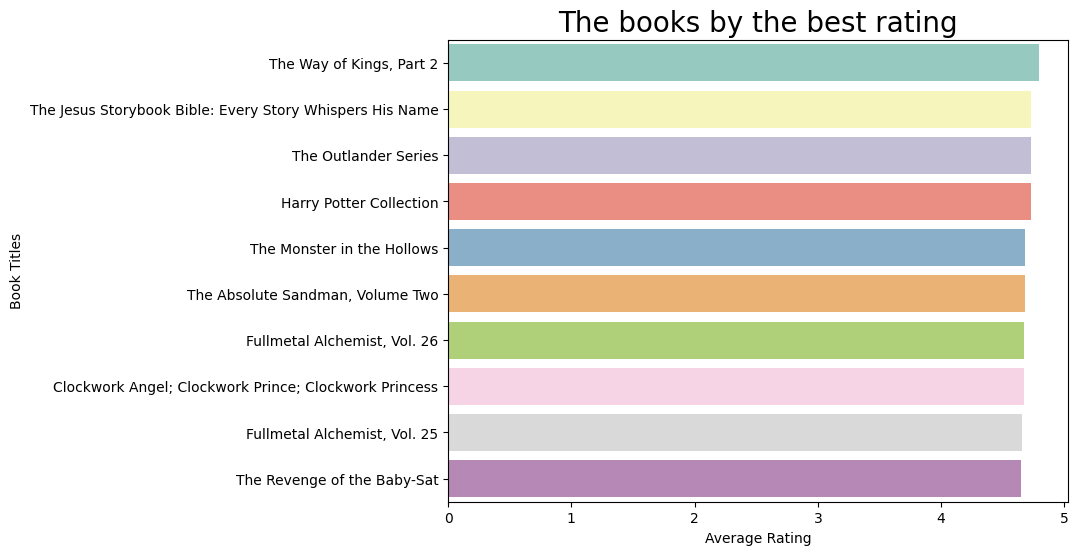

In [113]:
plt.figure(figsize=(8,6))
sns.barplot(x=books_rated['rating'], y=books_rated.index, palette='Set3')
plt.title('The books by the best rating', fontsize=20)
plt.xlabel('Average Rating')
plt.ylabel('Book Titles')
plt.show()

Observando la gráfica vemos que los libros con mejor valoración media son 'The way of kings, Part 2' y 'The Jesus Storybook Bible: Every Story Whispers His Name'

### Distribución de la variable 'average_rating'

/var/folders/6r/17dbwpxj45s03vzxrc5kddj40000gn/T/ipykernel_38057/1270893391.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.rating, color = 'teal')


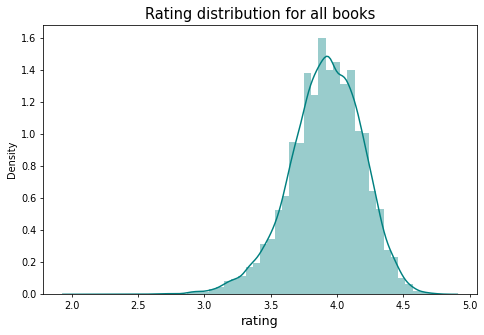

In [114]:
plt.figure(figsize=(8,5), dpi = 70)
sns.distplot(dataset.rating, color = 'teal')
plt.xlabel('rating', fontsize=13)
plt.title('Rating distribution for all books',fontsize=15)
plt.show()

### Distribución de la variable 'totalratings'

/var/folders/6r/17dbwpxj45s03vzxrc5kddj40000gn/T/ipykernel_38057/2981022792.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.totalratings, color = 'teal')


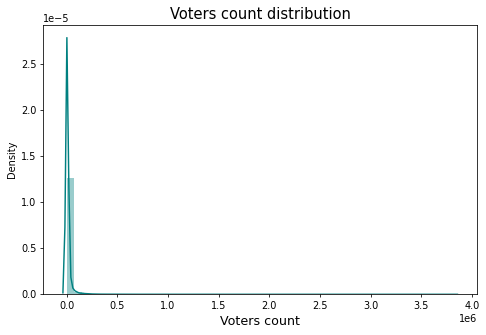

In [115]:
plt.figure(figsize=(8,5), dpi = 70)
sns.distplot(dataset.totalratings, color = 'teal')
plt.xlabel('Voters count', fontsize=13)
plt.title('Voters count distribution',fontsize=15)
plt.show()

### Relación entre 'rating' y 'totalratings'

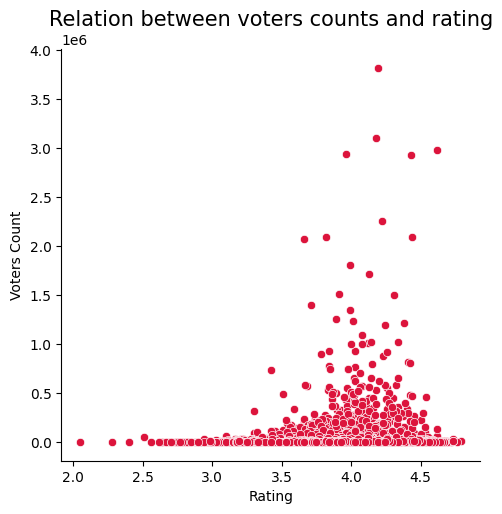

In [116]:
ax = sns.relplot(data=dataset, x="rating", y="totalratings", color = 'crimson', sizes=(100, 200), height=5, marker='o')
plt.title("Relation between voters counts and rating",fontsize = 15)
ax.set_axis_labels("Rating", "Voters Count")

No se observa ninguna relación significativa entre el número de votos y la puntuación del libro.